In [3]:
# to make the .py script runnable
#!/usr/bin/env python

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [5]:
import os
cdir = os.getcwd()
print(cdir)

/Users/AVNH/0 - Crunch Analytics/Notebooks


# 3.3 Star Wars

## 3.3.1 Data description

You are given ('StarWars.csv') the results of a survey performed at a local movie theater in Ghent. During 3 evenings, 500 couples were asked 9 questions. These couples were heterosexual, with both partners above 18 years. The nine questions were:
- How many (out of eight) Star Wars movies have you seen?
- What is your age?
- How many months have you been together?
- How much money do you spend, on average, on a monthly basis at a movie theater? This includes both tickets and food/drinks
- Are you a student?
- On a scale of 1 (certainly not) to 5 (certainly yes) do you consider yourself a fan of the Star Wars franchise?
- Order the following five drinks, with the first drink being the drink that you are most likelt to buy at the movie theater.
    - Cola
    - Beer
    - Fanta
    - Red Bull
    - Ice Tea
- When visiting the movie theater, do you mostly buy drinks (1), food (2) or nothing (3)?
- Do you plan on seeing the new Star Wars movie (The Last Jedi) in the movie theater?

## 3.3.2 Tasks

1. Take a look at the data, understand what you are seeing. Understand what scale each variable is. Transform the data if you want. Use the markdown functionality of Jupyter to structure this toy model research.
2. Summarize each relevant variable in a sensible way:
    - Statistically
    - Visually
3. Detect if there is funky stuff in the data (missing data/insensible data...). Copy the dataset and deal in the copy with this funky stuff.
4. Summarize the relevant relationships between variables in a sensible way:
    - Statistically
    - Visually
    - Pay special attention to the following relationships:
        - months together and age 
        - sex and money spend 
        - number of movies seen and fan-ness
        - number of movies seen and plans of seeing the new movie 
        - favourite drinks and shopping habits 
        - student and age
        - student & favourite drinks
5. Thinks again about the funky stuff. Would you handle it differently now?
6. Summarize some relevant three way relationships, e.g., is the link between money spend and being student different for each sex?
7. Formulate a reply to the following research questions:
    - Do likeminded people, concerning movies, become couples?
    - Do couples become likeminded, concerning movies?
    - Which drinks would you advertise during a screening of The Last Jedi?
    - Do men like Star Wars better than women?
    - Are Star Wars fans typically movie fanatics?
    - Are movie fanatics typically Star Wars fans?
    - How would you characterize people that spend a lot at the movie theater?
8. What follow-up survey/experiment/data collection would you advise?

## 3.3.3 Solutions

### 3.3.3.1 Look at the data

Take a look at the data, understand what you are seeing. Understand what scale each variable is. Transform the data if you want. Use the markdown functionality of Jupyter to structure this toy model research

In [7]:
sw_df = pd.read_csv('data/StarWars.csv', index_col=0)

In [ ]:
sw_df.sample(3)

In [ ]:
sw_df.info()

In [ ]:
sw_df.columns

In [ ]:
sw_df.dtypes

In [ ]:
sw_df.index

In [ ]:
sw_df.describe()

In [ ]:
sw_df.corr()

### 3.3.3.2 Summarize

Summarize each relevant variable in a sensible way

With .describe, we got most of the statistics that we want. It only takes into account the (presumed) numerical data. Consider the scales of the variables. Student, shop_hab and see_new_movie are, however, not numerical in nature. Nevertheless, the output can be informative. Student and see_new_movies are binary questions. Because of the coding (0=no and 1=yes), the mean is also the proportion of 'yes'. Shop_hab is not binary, so the mean is meaningless. The quartiles do say something, but we will need calculate some more statistics. Sex and fav_drinks are not considered numerical by Python. We will add some more summary for Sex. fav_drinks is more tricky. We will give each of the drinks a score per subject (5 for the favourite drink - 1 for the least favourite), summing these will give a (not the) global scale of which drinks people like. For interpretation, keep in mind that of all people like the same drink, the total score would be 5000. 

You will see that these exploratory steps have an overlap with sanity checks. We will already start flagging when we note something weird in the data. 

In [ ]:
sw_df.describe()

In [ ]:
sw_df['sex'].unique()

In [ ]:
sw_df['movies'].value_counts()

In [ ]:
sw_df.groupby(['movies']).count()

In [ ]:
sns.distplot(sw_df.movies,hist=True, kde=False)
plt.show()

In [ ]:
sns.boxplot(y=sw_df.movies)
plt.show()

In [ ]:
sns.distplot(sw_df.age,hist=True, kde=False)
plt.show()

In [ ]:
sns.boxplot(y=sw_df.age)
plt.show()

In [ ]:
sw_df['sex'].value_counts() #something funky!

In [ ]:
sw_df[sw_df['sex'].isnull()]

In [ ]:
sns.countplot(x='sex',data=sw_df)
plt.show()

In [ ]:
sw_df['couplenumber'].value_counts().unique()

In [ ]:
len(sw_df['couplenumber'].unique())

In [ ]:
sns.distplot(sw_df.couplenumber, kde=False) #something funky!
plt.show() 

In [ ]:
sw_df.couplenumber.value_counts() #look at the highest and the lowest

In [ ]:
#sns.distplot(sw_df.months_together,hist=True, kde=False) 
#plt.show()
# Delete the first '#'s to see that something funky is going on

In [ ]:
sw_df.months_together.value_counts() #look at the highest and the lowest

In [ ]:
sw_df.months_together.unique() #look at the highest and the lowest

In [ ]:
sns.distplot(sw_df[sw_df.months_together.notnull()].months_together,kde=False)
plt.show()

In [ ]:
sns.boxplot(y=sw_df.months_together)
plt.show()

In [ ]:
sns.distplot(sw_df.money_spend,hist=True, kde=False) #something funky
plt.show()

In [ ]:
sns.boxplot(y=sw_df.money_spend)
plt.show()

In [ ]:
sns.countplot(x='student',data=sw_df) #something funky!
plt.show()

In [ ]:
sw_df.student.value_counts() #something funky!

In [ ]:
#sns.distplot(sw_df.fan,hist=True, kde=False)
#plt.show()
# Delete the first '#'s to see that something funky is going on

In [ ]:
sns.distplot(sw_df[sw_df.fan.notnull()].fan,kde=False) #meh?
plt.show()

In [ ]:
sns.boxplot(y=sw_df.fan) #meh? Think about coarsness
plt.show()

In [ ]:
sns.countplot(sw_df[sw_df.fan.notnull()].fan)
plt.show()

In [ ]:
sw_df.fan.value_counts()

In [ ]:
shop_map = {}
shop_map[1] = 'drinks'
shop_map[2] = 'food'
shop_map[3] = 'nothing'

In [ ]:
shop_map

In [ ]:
sw_df['shop_hab'].value_counts()

In [ ]:
sw_df['shop_hab_descr'] = sw_df['shop_hab'].map(shop_map)

In [ ]:
sw_df['shop_hab_descr'].value_counts()

In [ ]:
sns.countplot(sw_df[sw_df.shop_hab.notnull()].shop_hab)
plt.show()

In [ ]:
sns.countplot(x='see_new_movie',data=sw_df)
plt.show()

In [ ]:
sw_df.see_new_movie.value_counts()

In [ ]:
sw_df['fav_drinks'].unique()

In [ ]:
def drink_rank(lst):
    lst = lst.split(', ')
    s = {}
    for i in range(len(lst)):
        s[lst[i]] = abs(i - 5)
    return s

In [ ]:
rank_series = sw_df['fav_drinks'].apply(lambda x: drink_rank(x))

In [ ]:
rank_series

In [ ]:
for d in ['ice tea', 'beer', 'red bull', 'fanta', 'cola']:
    sw_df[d + '_rank'] = rank_series.apply(lambda x: x[d])

In [ ]:
sw_df.sample(3)

In [ ]:
# Next also determine the single favourite drink
sw_df['single_fav_drink'] = sw_df['fav_drinks'].apply(lambda x: x.split(', ')[0])

In [ ]:
sw_df['single_fav_drink'].value_counts()

In [ ]:
sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].sum()

Some more looking around

In [ ]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='movies', hue='sex', data=sw_df)
plt.xlabel("Number of movies seen")
plt.ylabel("# Observations")
plt.show()

In [ ]:
sns.violinplot(x='sex', y='age', data=sw_df)
plt.show()

In [12]:
# Calculate correlations
corr = sw_df.corr()
corr

,movies,age,couplenumber,months_together,money_spend,student,fan,shop_hab,see_new_movie
movies,1.000000,0.023139,0.059772,-0.004031,0.083558,-0.004172,0.901231,0.048423,0.745144
age,0.023139,1.000000,-0.044886,0.636261,0.095629,-0.616505,0.044324,0.081993,0.000962
couplenumber,0.059772,-0.044886,1.000000,-0.071050,-0.025224,0.010874,0.043112,0.000608,0.095018
months_together,-0.004031,0.636261,-0.071050,1.000000,0.012397,-0.364731,0.041268,0.047368,0.000838
money_spend,0.083558,0.095629,-0.025224,0.012397,1.000000,-0.069416,0.072657,0.086196,0.054170
student,-0.004172,-0.616505,0.010874,-0.364731,-0.069416,1.000000,-0.023648,-0.045163,0.011100
fan,0.901231,0.044324,0.043112,0.041268,0.072657,-0.023648,1.000000,0.064442,0.675728
shop_hab,0.048423,0.081993,0.000608,0.047368,0.086196,-0.045163,0.064442,1.000000,0.030451
see_new_movie,0.745144,0.000962,0.095018,0.000838,0.054170,0.011100,0.675728,0.030451,1.000000


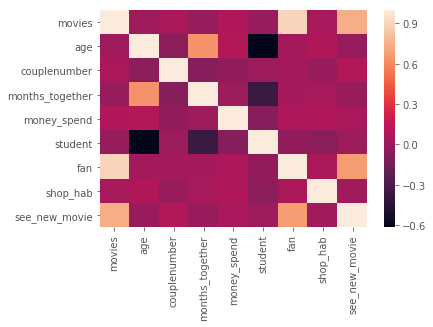

In [8]:
# Calculate correlations
corr = sw_df.corr()
# Heatmap
sns.heatmap(corr)
# View the plot
plt.show()

### 3.3.3.3 Sanity checks

#### Look for missing data

In [ ]:
# Look for misssing values
for c in sw_df.columns:
    nb_missing = sum(sw_df[c].isnull())
    if nb_missing > 0:
        print(str(nb_missing) + " missing values in: " + str(c))

In [ ]:
# Impute the misssing values
sw_df[sw_df['sex'].isnull() == True]['couplenumber']

In [ ]:
sw_df[sw_df['couplenumber'] == 166]

In [ ]:
# ==> missing person is female! (assuming heterosexual)
# This is not a good structural solution of course, but quick and dirty
sw_df['sex'] = sw_df['sex'].fillna('female')
print(sum(sw_df['sex'].isnull()))

#### Missing values in months together

In [ ]:
sw_df.sample(3)

In [ ]:
sw_male_df = sw_df.query('sex == "male"')
sw_female_df = sw_df.query('sex == "female"')

In [ ]:
sw_male_df[sw_male_df['months_together'].isnull()]

In [ ]:
sw_df.groupby(['sex']).count()

In [ ]:
sw_df.groupby(['couplenumber']).count().head(5)

In [ ]:
sw_df.groupby(['couplenumber']).max()['months_together'].head(5)

In [ ]:
# Find the months together for each couple
grouped_by_couple = sw_df.groupby("couplenumber")


In [ ]:
couple_months_together = grouped_by_couple.aggregate(np.max)['months_together']
print(couple_months_together.head(5))

In [ ]:
couple_months_together.isnull().value_counts()

In [ ]:
sw_df[sw_df['months_together'].isnull()]

In [ ]:
# Fill out the missing values in months together
sw_df['months_together'] = sw_df['couplenumber'].apply(lambda x: couple_months_together[x])

In [ ]:
# Also calculate the years together
sw_df['years_together'] = sw_df['months_together'].apply(lambda x: int(round(x / 12.0)))

In [ ]:
sw_df[sw_df['months_together'].isnull()]

In [ ]:
sw_df.loc[sw_df['couplenumber']==65]

#### Missing values in the fan score

I am going to use the number of movies seen as the explanatory variable to impute the missing values (as evidenced by the correlation matrix above this is a reasonable assumption)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
myLR = LinearRegression()

In [ ]:
# Create my X and Y variables
myX = sw_df.dropna()['movies'].values
myY = sw_df.dropna()['fan'].values

In [ ]:
print(len(myX))
print(len(myY))

In [ ]:
print(type(myX))
print(type(myY))

In [ ]:
print(myX)
print(myY)

In [ ]:
print(myX.reshape(-1, 1))


In [ ]:
# Fit the regression model
myLR.fit(myX.reshape(-1, 1), myY)

In [ ]:
myLR.coef_

In [ ]:
myLR.intercept_

In [ ]:
sw_df.movies.max()

In [ ]:
#x_test = np.array([[1]])
x_test = np.array([1]).reshape(-1, 1)

In [ ]:
myLR.predict(x_test)

In [ ]:
x = list(range(0, 10000))
y = []
for i in x:
    # I'm going to round the results
    y.append(myLR.predict(np.array(i).reshape(-1, 1)).round())

In [ ]:
# Quick check to see if we are not exceeding the scale
plt.plot(x, y, color='blue', linewidth=3)
plt.xlabel("Number of movies seen")
plt.ylabel("Predicted fan score")
plt.show()

In [ ]:
# Create predictions for each of the observations
missing_fan_proxy = sw_df['movies'].apply(lambda x: myLR.predict(np.array(x).reshape(-1, 1)).round()[0])

In [ ]:
missing_fan_proxy.value_counts()

In [ ]:
# Replace the missing values
sw_df['fan'] = sw_df['fan'].fillna(value=missing_fan_proxy)

In [ ]:
sw_df[sw_df['fan'].isnull()]

#### Wrong couplenumber

There are three people with couplenumber 450 and one with couplenumber 45. Which of the three '450' belongs with the one '45' can be seen by comparing the months_together

In [ ]:
sw_df.loc[sw_df.couplenumber==450]

In [ ]:
sw_df.loc[sw_df.couplenumber==45]

In [ ]:
sw_df['couplenumber'].value_counts()[sw_df['couplenumber'].value_counts() != 2]

In [ ]:
# Get a list with the two couple numbers 
couplenrs = sw_df['couplenumber'].value_counts()[sw_df['couplenumber'].value_counts() != 2].index
couplenrs

In [ ]:
# Create a map based on the months together
error_filter = sw_df['couplenumber'].apply(lambda x: True if x in couplenrs else False)
#print(error_filter)
sw_df.loc[error_filter]

In [ ]:
newMap = {}
cnt = 0
for mt in sw_df.loc[error_filter]['months_together'].value_counts().index:
    subset = sw_df.loc[error_filter].query('months_together == ' + str(mt))
    for i in subset.index.values:
        newMap[i] = couplenrs[cnt]
    cnt += 1

In [ ]:
newMap

In [ ]:
for i in newMap.keys():
    sw_df.loc[i, 'couplenumber'] = newMap[i]

In [ ]:
# It works
sw_df.loc[newMap.keys()]

#### Wrong student

Based on age, we will assume that this person is not a student

In [ ]:
sw_df.loc[sw_df.student==2]

In [ ]:
sw_df.loc[sw_df.student==2,'student']=0

In [ ]:
sw_df.loc[sw_df.student==2]

#### Wrong months_together

One couple is too young to be together for over 20 years. We assume that 'age' is wrong. The reason for this is that this couple has the same 'months together', which indicates a correct observation. This is, however, conjecture. Another option is just to drop these observations. 

In [ ]:
sw_df.loc[sw_df.months_together/12>sw_df.age-10]

In [ ]:
myY = sw_df['age'].values
myX = sw_df['months_together'].values

In [ ]:
myLR = LinearRegression()

In [ ]:
myLR.fit(myX.reshape(-1, 1), myY)

In [ ]:
myLR.predict(np.array(262).reshape(-1, 1)).round()

In [ ]:
sw_df.loc[sw_df.months_together/12>sw_df.age-10,'age']=myLR.predict(np.array(262).reshape(-1, 1)).round()#round(myLR.predict(262),1)

In [ ]:
sw_df.loc[sw_df.months_together/12>sw_df.age-10]

In [ ]:
sw_df.loc[sw_df["couplenumber"]==80]

### 3.3.3.4 Analyse some of the statistical relations

* months together and age
* sex and money spend
* number of movies seen and fan-ness
* number of movies seen and plans of seeing the new movie
* favourite drinks and shopping habits
* student and age
* student & favourite drinks

#### Correlations

Think about which correlations make sense and which don't.

In [ ]:
sw_df.sample(3)

In [ ]:
sw_df.corr()

#### Relationship between number of months together and age

In [ ]:
sns.lmplot(x='age', y='months_together', data=sw_df, fit_reg=True)
plt.show()

#### Sex versus money spend

In [ ]:
sns.boxplot(x='sex', y='money_spend', data=sw_df)
plt.show()

#### Fan score and number of movies seen

Note that causality is a tricky one --> does one become a fan by seeing more movies? Or vice versa?

For now I've made the plots assuming that the number of movies seen is the dependent variable but you could of course argue the inverse relationship. (But since there are less categories for 'fan' this makes prettier plots)

We are once again confronted with a coarsness dilemma. 'fan' and 'movies' have few outcomes for a scatterplot, but a lot for boxplots and heatmaps.

In [ ]:
sns.lmplot(x='fan', y='movies', data=sw_df, fit_reg=True)
plt.show()

In [ ]:
sns.boxplot(x='fan', y='movies', data=sw_df)
plt.show()

In [9]:
pd.crosstab(sw_df.fan,sw_df.movies)

movies,0,1,2,3,4,5,6,7,8
fan,,,,,,,,,
1.0,308,74,27,40,0,0,0,0,0
2.0,0,80,31,59,6,3,0,0,0
3.0,0,18,3,34,9,10,6,22,0
4.0,0,0,0,15,17,11,7,53,17
5.0,0,0,0,0,4,3,11,49,72


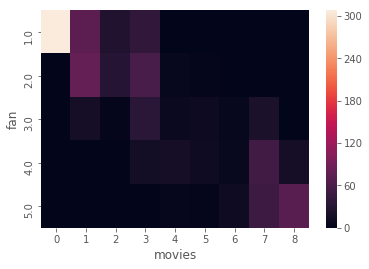

In [10]:
sns.heatmap(pd.crosstab(sw_df.fan,sw_df.movies))
plt.show()

In [ ]:
sns.violinplot(x='fan',
               y='movies', 
               data=sw_df, 
               inner=None) # Remove the bars inside the violins)

sns.swarmplot(x='fan', 
              y='movies', 
              data=sw_df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

In [ ]:
plt.show()

#### Number of movies seen and seeing the new movie

In [ ]:
sw_df.columns

In [ ]:
sns.catplot("movies", "see_new_movie", data=sw_df, kind='bar')
plt.xlabel('Number of movies seen')
plt.ylabel('Fraction planning to see new movie')
plt.show()

In [ ]:
# Check that there is really nobody who is planning to see the new movie
# in the category 0 movies seen
sw_df[sw_df['movies'] == 0]['see_new_movie'].value_counts()

#### Favourite drinks and shopping habits

First, look at the favourite drinks

In [ ]:
sns.countplot(x="shop_hab_descr", hue="single_fav_drink", data=sw_df)
plt.xlabel("Favourite drink")
plt.ylabel("Number observations")
plt.show()

We scale the total ranks bij maximum score attainable in that shop_hab category. (getting 5 on all observations)

In [ ]:
sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.shop_hab_descr =='nothing'].sum()/len(sw_df.loc[sw_df.shop_hab_descr =='nothing'])*5

In [ ]:
sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.shop_hab_descr =='drinks'].sum()/len(sw_df.loc[sw_df.shop_hab_descr =='drinks'])*5

In [ ]:
sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.shop_hab_descr =='food'].sum()/len(sw_df.loc[sw_df.shop_hab_descr =='food'])*5

Put them together

In [ ]:
habit_drink = pd.DataFrame(
    {'Nothing': sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.shop_hab_descr =='nothing'].sum()/len(sw_df.loc[sw_df.shop_hab_descr =='nothing'])*5,
     'Drinks': sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.shop_hab_descr =='drinks'].sum()/len(sw_df.loc[sw_df.shop_hab_descr =='drinks'])*5,
     'Food' : sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.shop_hab_descr =='food'].sum()/len(sw_df.loc[sw_df.shop_hab_descr =='food'])*5
    })
print(habit_drink)

In [ ]:
habit_drink.plot(kind='bar')
plt.show()

#### Student and age

In [ ]:
sns.boxplot(x='student', y='age', data=sw_df)
plt.xlabel('Is a student (1) or not (0)')
plt.show()

#### Student and favourite drinks

First, we look at the favouriet drink

In [ ]:
sns.countplot(x="student", hue="single_fav_drink", data=sw_df)
plt.xlabel("Student (1) or not (0)")
plt.ylabel("Number observations")
plt.show()

Now we give each drink a score based upon its rank

In [ ]:
student_drink = pd.DataFrame(
    {'Student': sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.student ==1].sum()/len(sw_df.loc[sw_df.student ==1])*5,
     'No Student': sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.student ==0].sum()/len(sw_df.loc[sw_df.student ==0])*5
    })
print(student_drink)

In [ ]:
student_drink.plot(kind='bar')
plt.show()

### 3.3.3.5 What about the funky stuff?

As you can see in the previous sections we use the relationship between the missing or funky data and other variables to predict and replace the problematic observations. 

### 3.3.3.6 is the link between money spend and being student different for each sex?

In [ ]:
g = sns.catplot("sex", 
                   "money_spend", 
                   "student", 
                   data=sw_df, 
                   kind="bar", 
                   palette="muted", 
                   legend=True)
plt.show()

In [ ]:
# Let's see if we can calculate the relative increase
piv = sw_df.pivot_table(values='money_spend', columns='student', index='sex')

In [ ]:
piv

In [ ]:
# Percentage increase for male and female
(piv.iloc[:, 1] / piv.iloc[:, 0] - 1) * 100

** The relative increase in spend after starting to work is larger for females **

In [ ]:
piv.iloc[:, 1] - piv.iloc[:, 0]

** As is the absolute increase **

However, is this difference large enough to be considered significant? Or is this merely coincidential? More on this next class

### 3.3.3.7 Investigate relationships

####  Do likeminded people, concerning movies, become couples? & Do couples become likeminded, concerning movies?

In [ ]:
# Create a new split with the data without errors (missings)
sw_male_df = sw_df.query('sex == "male"')
sw_female_df = sw_df.query('sex == "female"')
# Create a joined table for the couples
couples_df = pd.merge(sw_female_df, sw_male_df, on='couplenumber', suffixes=['_f', '_m'])

In [ ]:
couples_df.columns

In [ ]:
couples_df.sample(3)

In [ ]:
# Calculate some couple-specific metrics
couples_df['abs_diff_movies'] = abs(couples_df['movies_f'] - couples_df['movies_m'])
couples_df['abs_diff_fan'] = abs(couples_df['fan_f'] - couples_df['fan_m'])
couples_df['diff_movies'] = couples_df['movies_f'] - couples_df['movies_m']
couples_df['diff_fan'] = couples_df['fan_f'] - couples_df['fan_m']

In [ ]:
# Let's see if couples that have been together for longer are more similar
sns.lmplot(x='years_together_f', y='abs_diff_movies', data=couples_df)
plt.show()

Don't really like this plot, let's see if we can find something better for this...

In [ ]:
sns.catplot(x="years_together_f", y="abs_diff_movies", data=couples_df)
plt.show()

In [ ]:
sns.swarmplot(x="years_together_f", y="abs_diff_movies", data=couples_df)
plt.show()

In [ ]:
def cat_age(years):
    if years < 10:
        cat = 1
    if 10 <= years < 20:
        cat = 2
    if years >= 20:
        cat = 3
    return cat

In [ ]:
couples_df['Age_cat']=couples_df['years_together_m'].apply(lambda x: cat_age(x))

In [ ]:
couples_df.sample(3)

In [ ]:
couples_df.loc[couples_df.Age_cat==1].abs_diff_movies.mean()

In [ ]:
couples_df.loc[couples_df.Age_cat==2].abs_diff_movies.mean()

In [ ]:
couples_df.loc[couples_df.Age_cat==3].abs_diff_movies.mean()

In [ ]:
sns.boxplot(x='Age_cat', y='abs_diff_movies', data=couples_df)
plt.show()

It doesn't seem that the within-couple difference is smaller for older people. As such, it seems that like-minded people are attracted, not vice versa.

#### Which drinks would you advertise during a screening of The Last Jedi?

In [ ]:
sns.barplot(x='single_fav_drink', y='see_new_movie', data=sw_df)
plt.show()

In [ ]:
sns.countplot(x='single_fav_drink', hue='see_new_movie', data=sw_df)
plt.show()

In [ ]:
piv = sw_df.pivot_table(values="see_new_movie", 
                        columns='single_fav_drink')

In [ ]:
piv

In [ ]:
piv.plot(kind='bar')
plt.show()

Dual conclusions: 

If you want to advertise to the largest amount of people that will like a specific drink your best bet would be to advertise cola or beer.

However if you assume that this is a cross-section of the overall population you could argue that a relatively large fraction of beer drinkers (38%) intends to go see this movie, hence it might be a good advertising target from the perspective of a beer company. (Versus only 32% for cola).

Note that another interesting analysis could use the average scores rather than only using the most desired drink. 

Another possibility is to focus the analysis on the people who indicate they buy drinks (not 'food' or 'nothing')

####  Do men like Star Wars better than women?

In [ ]:
sw_df.loc[sw_df.sex == "male"].movies.mean()-sw_df.loc[sw_df.sex == "female"].movies.mean()

In [ ]:
sw_df.loc[sw_df.sex == "male"].fan.mean()-sw_df.loc[sw_df.sex == "female"].fan.mean()

In [ ]:
sns.boxplot(x='sex', y='movies', data=sw_df)
plt.show()

In [ ]:
sns.boxplot(x='sex', y='fan', data=sw_df)
plt.show()

On average, men seem to watch more movies than women, but do not identify more as a fan than women.

####  Are Star Wars fans typically movie fanatics? & Are movie fanatics typically Star Wars fans?

In [ ]:
sns.lmplot(x='money_spend', y='movies', data=sw_df)
plt.show()

In [ ]:
sw_df['money_spend'].corr(sw_df['movies'])

There doesn't seem to be a (linear) link between being a Star Wars fan and being a movie fanatic. This also holds for the inverse relationship (correlations are symmetric)

#### How would you characterize people that spend a lot at the movie theater?

First we need to decide who is considered to be spending a lot. We will take the upper quartile. 

In [ ]:
sw_df.quantile(0.75)['money_spend']

In [ ]:
sw_df.loc[sw_df.money_spend>sw_df.quantile(0.75)['money_spend']].describe()

In [ ]:
sw_df.loc[sw_df.money_spend>sw_df.quantile(0.75)['money_spend']].describe()-sw_df.describe()

In [ ]:
sw_df[['ice tea_rank', 'beer_rank', 'red bull_rank', 'fanta_rank', 'cola_rank']].loc[sw_df.money_spend>sw_df.quantile(0.75)['money_spend']].sum()

Watch out for weird conclusions. E.g., big spenders seem to be older (makes sense), but they also seem to be longer in a relationship. This is probably due to being older, not for spending a lot of money. Other collumns are completely meaningless, e.g., couplenumber or shop hab. 